# Steps of the Notebook
<a id="toc"></a>
- [1. Template Testing](#1)
- [2. Import Libraries](#2)
- [3. Pass the data path](#3)
- [4.Splitting the data into Training and Testing datasets](#4)
- [5. Adjust Diminsions of the Images](#5)
- [6. Normalization](#6)
- [7. One Hot Encoding](#7)
- [8. Adjust Early Stop](#8)
- [9. Adjust ANN and it's Parameters](#9)
    - [9.1 Plot Loss Curve ANN](#9.1)
    - [9.2 Plot Accuarcy Curve ANN](#9.2)
    - [9.3 Plot Confusion Matrix ANN](#9.3)
    - [9.4 Generate Classification Report](#9.4)
- [10. Adjust CNN and it's Parameters](#10)
    - [10.1 Plot Loss Curve CNN](#10.1)
    - [10.2 Plot Accuarcy Curve CNN](#10.2)
    - [10.3 Plot Confusion Matrix CNN](#10.3)
    - [10.4 Generate Classification Report](#10.4)

# Template Testing

**I am Testing the template on birds classification data set i just pass the data's path and adjust some parameters in the NNs and that's it**<br>
**And I saved hours :)**

# Import Libraries

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.image import imread
from seaborn import heatmap
import cv2
import random
from os import listdir

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import  LabelBinarizer

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import callbacks
from tensorflow.math import confusion_matrix

# Pass the Data path

In [2]:
data_path = 'Data'

In [3]:
# Setting path and creating empty lists
dir = data_path
root_dir = listdir(dir)
image_list, label_list = [], []

In [4]:
root_dir

['AMERICAN GOLDFINCH',
 'BARN OWL',
 'CARMINE BEE-EATER',
 'DOWNY WOODPECKER',
 'EMPEROR PENGUIN',
 'FLAMINGO']

In [9]:
# Reading and converting image to numpy array
for directory in root_dir:
    for files in listdir(f"{dir}/{directory}"):
        image_path = f"{dir}/{directory}/{files}"
        image = cv2.imread(image_path)
        image = img_to_array(image)
        image_list.append(image)
        label_list.append(directory)

In [13]:
image_list[0]

array([[[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 95., 111., 118.],
        ...,
        [ 96., 111., 120.],
        [ 96., 112., 119.],
        [ 98., 114., 121.]],

       [[ 93., 109., 116.],
        [ 94., 110., 117.],
        [ 94., 110., 117.],
        ...,
        [ 94., 109., 118.],
        [ 95., 111., 118.],
        [ 96., 112., 119.]],

       [[ 93., 108., 117.],
        [ 94., 109., 118.],
        [ 93., 108., 117.],
        ...,
        [ 97., 112., 121.],
        [ 98., 114., 121.],
        [ 99., 115., 122.]],

       ...,

       [[ 78.,  94.,  93.],
        [ 77.,  93.,  92.],
        [ 76.,  91.,  93.],
        ...,
        [153., 156., 161.],
        [153., 156., 161.],
        [153., 156., 161.]],

       [[ 83.,  97.,  96.],
        [ 81.,  95.,  94.],
        [ 77.,  92.,  94.],
        ...,
        [153., 156., 160.],
        [153., 156., 160.],
        [152., 155., 159.]],

       [[ 84.,  98.,  97.],
        [ 82.,  96.,  95.],
        [ 77.,  

In [23]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()

In [24]:
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [25]:
num_classes = len(label_counts)
num_classes

6

# Splitting the data into Training and Testing

In [26]:
# Splitting dataset
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.3, random_state = 0) 

# Adjust Diminsions of the images

In [27]:
image_width = image_list[0].shape[0]
image_height = image_list[0].shape[1]
image_channel = image_list[0].shape[2]

In [28]:
print(image_width)
print(image_height)
print(image_channel)

224
224
3


# Normlization

In [29]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, image_width, image_height, image_channel)
x_test = x_test.reshape( -1, image_width, image_height, image_channel)

# One Hot Encoding

In [30]:
# One hot encoding on target variable
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


# Adjust Early Stop

In [31]:
early_stopping = callbacks.EarlyStopping(
        patience=10,
        min_delta=0,
        monitor='val_loss',
        restore_best_weights=True,
        verbose=0,
        mode='min', 
        baseline=None,
    )
plateau = callbacks.ReduceLROnPlateau(
            monitor='val_loss', 
            factor=0.2, 
            patience=4, 
            verbose=0,
            mode='min')

# Adjust ANN and it's Parameters

I just have adjusted the parameters in the template it contains 5 hidden layers i remove 2 of them and adjust Learning Rate and removed the batch size <br>
You can adjust as you want to what suits your data

In [34]:
hidden_layer1 = 512
hidden_layer2 = 256
hidden_layer3 = 128
hidden_layers_activation = 'relu'
output_layer_activation = 'softmax'

LEARNING_RATE = 0.0005
loss_function = 'categorical_crossentropy'
ANN_epochs = 1000
batch_size = 10

ANN_model_checkpoint = callbacks.ModelCheckpoint('ANN_best_model.h5', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)


In [35]:
def load_model(): 
    ann_model = Sequential([
        Flatten(input_shape=(image_width,image_height,image_channel)),
        Dense(hidden_layer1, activation =hidden_layers_activation),
        Dense(hidden_layer2, activation =hidden_layers_activation),
        Dense(hidden_layer3, activation =hidden_layers_activation),
        Dense(num_classes, activation=output_layer_activation),
    ])
    model.compile(
        optimizer= Adam(learning_rate=LEARNING_RATE),
        loss=loss_function,
        metrics=['acc'],
    )
    return ann_model

ann_model = load_model()
history_ann = ann_model.fit(  x_train , y_train,
                validation_data = (x_test , y_test),
                epochs = ANN_epochs,
                callbacks = [early_stopping , plateau, ANN_model_checkpoint],
              )

Epoch 1/1000
18/18 [==============================] - 14s 777ms/step - loss: 29.1369 - acc: 0.1799 - val_loss: 16.7611 - val_acc: 0.1967 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 13s 764ms/step - loss: 8.0755 - acc: 0.3157 - val_loss: 6.1884 - val_acc: 0.3566 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 4s 237ms/step - loss: 4.8442 - acc: 0.4303 - val_loss: 7.3282 - val_acc: 0.4344 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 13s 768ms/step - loss: 3.6505 - acc: 0.4991 - val_loss: 3.7716 - val_acc: 0.5410 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 13s 752ms/step - loss: 2.6711 - acc: 0.5750 - val_loss: 3.4361 - val_acc: 0.5369 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 13s 752ms/step - loss: 2.2285 - acc: 0.5785 - val_loss: 2.1006 - val_acc: 0.5369 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 4s 232ms/step - loss: 1.5925 - ac

In [36]:
ann_model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 43ms/step - loss: 0.9726 - acc: 0.7049


[0.9725654721260071, 0.7049180269241333]

##  Loss Curve ANN

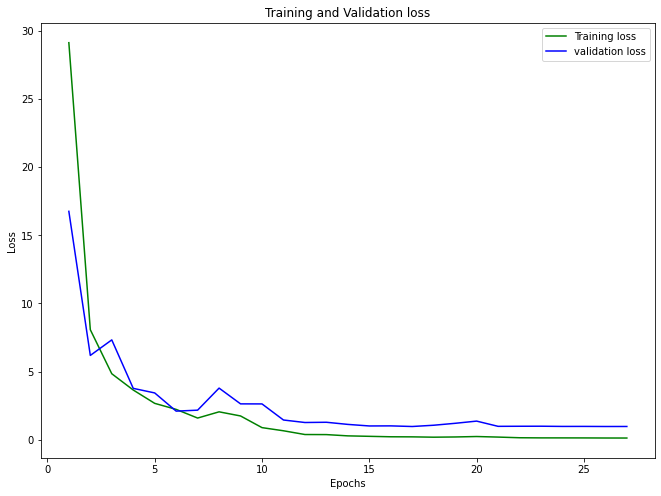

In [41]:
plt.figure(figsize=(11,8))
loss_train = history_ann.history['loss']
loss_val = history_ann.history['val_loss']
epochs = range(1,len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuarcy Curve ANN

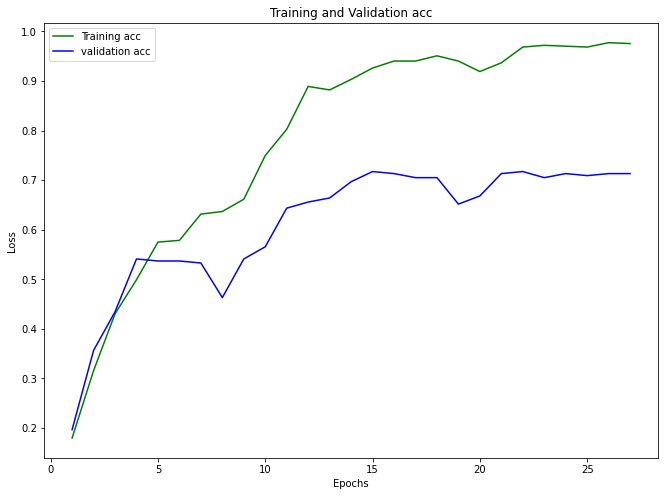

In [61]:
plt.figure(figsize=(11,8))
val_train = history_ann.history['acc']
val_acc = history_ann.history['val_acc']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs, val_train, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix ANN

In [50]:
def conf_matrix(y_test, y_pred):
    y_predicted_labels = [np.argmax(i) for i in y_pred]
    y_predicted_labels = np.array(y_predicted_labels)
    y_test = np.argmax(y_test, axis=1)
    cm = confusion_matrix(labels=y_test, predictions=y_predicted_labels)
    plt.figure(figsize=(12,10))
    heatmap(cm, annot=True, fmt='d');

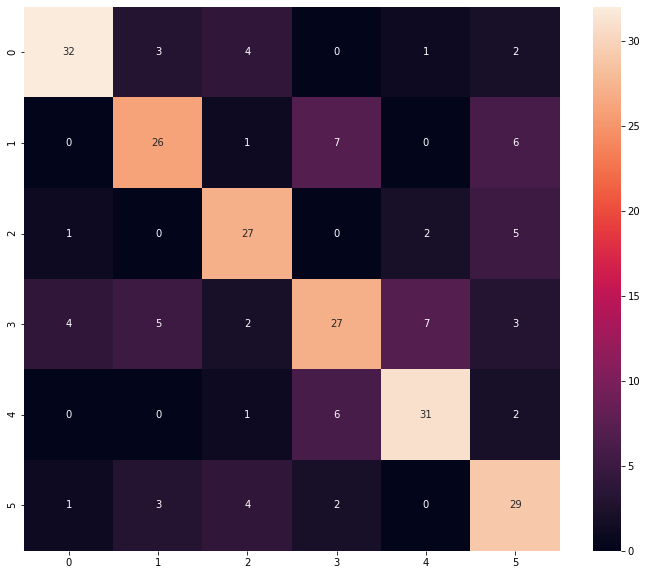

In [51]:
y_pred_ann = ann_model.predict(x_test)
conf_matrix(y_test, y_pred_ann)

## Classification Report ANN

In [52]:
def class_report(y_test, y_pred):
    y_predicted_labels = [np.argmax(i) for i in y_pred]
    y_predicted_labels = np.array(y_predicted_labels)
    y_test = np.argmax(y_test, axis=1)
    print(classification_report(y_test, y_predicted_labels))

In [53]:
class_report(y_pred_ann, y_test)

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.65      0.70      0.68        37
           2       0.77      0.69      0.73        39
           3       0.56      0.64      0.60        42
           4       0.78      0.76      0.77        41
           5       0.74      0.62      0.67        47

    accuracy                           0.70       244
   macro avg       0.71      0.71      0.71       244
weighted avg       0.71      0.70      0.71       244



# Adjust CNN and it's Parameters

I have adjusted the number of filters and using pool_size2 and 3 instead of 1, i have changed the activation function also<br>
You get the idea adjust as you want :)

In [55]:
filters1 = 8
filters2 = 16
filters3 = 32

kernel_size = (3,3)
conv_activation = 'relu'

pool_size1 = (5,5)
pool_size2 = (3,3)
pool_size3 = (2,2)

hidden_layer1 = 128

hidden_layer_activation = 'relu'
output_layer_activation = 'softmax'

LEARNING_RATE = 0.0005
loss_function = 'categorical_crossentropy'
CNN_epochs = 1000
batch_size = 15

CNN_model_checkpoint = callbacks.ModelCheckpoint('CNN_best_model.h5', monitor='val_loss', mode='min', patience = 10 ,save_best_only=True)

In [57]:
def load_model():
    cnn_model = Sequential([
        Conv2D(filters1, kernel_size = kernel_size,input_shape=(image_width,image_height,image_channel), activation=conv_activation),
        MaxPooling2D(pool_size=pool_size2),
        Conv2D(filters2, kernel_size = kernel_size, activation=conv_activation),
        MaxPooling2D(pool_size=pool_size3),
        Conv2D(filters3, kernel_size = kernel_size, activation= conv_activation),
        MaxPooling2D(pool_size=pool_size3),
        
        Flatten(),
        
        Dense(hidden_layer1, activation =hidden_layer_activation),
        Dense(num_classes, activation=output_layer_activation)    
    ])
    cnn_model.compile(
        Adam(learning_rate=LEARNING_RATE),
        loss = loss_function,
        metrics = ['acc']
    )
    return cnn_model



cnn_model = load_model()
history_cnn = cnn_model.fit(  x_train , y_train,
                validation_data = (x_test , y_test),
                epochs = CNN_epochs,
                callbacks = [early_stopping , plateau, CNN_model_checkpoint],
              )


Epoch 1/1000
18/18 [==============================] - 4s 181ms/step - loss: 1.7894 - acc: 0.2751 - val_loss: 1.6519 - val_acc: 0.4426 - lr: 5.0000e-04
Epoch 2/1000
18/18 [==============================] - 3s 173ms/step - loss: 1.4736 - acc: 0.5220 - val_loss: 1.2592 - val_acc: 0.6148 - lr: 5.0000e-04
Epoch 3/1000
18/18 [==============================] - 3s 172ms/step - loss: 1.0294 - acc: 0.6226 - val_loss: 0.9700 - val_acc: 0.6393 - lr: 5.0000e-04
Epoch 4/1000
18/18 [==============================] - 3s 179ms/step - loss: 0.6990 - acc: 0.7460 - val_loss: 0.6664 - val_acc: 0.7828 - lr: 5.0000e-04
Epoch 5/1000
18/18 [==============================] - 3s 173ms/step - loss: 0.4858 - acc: 0.8325 - val_loss: 0.5424 - val_acc: 0.7787 - lr: 5.0000e-04
Epoch 6/1000
18/18 [==============================] - 3s 171ms/step - loss: 0.4204 - acc: 0.8677 - val_loss: 0.6021 - val_acc: 0.7951 - lr: 5.0000e-04
Epoch 7/1000
18/18 [==============================] - 3s 185ms/step - loss: 0.3010 - acc: 0.91

## Loss Curve CNN

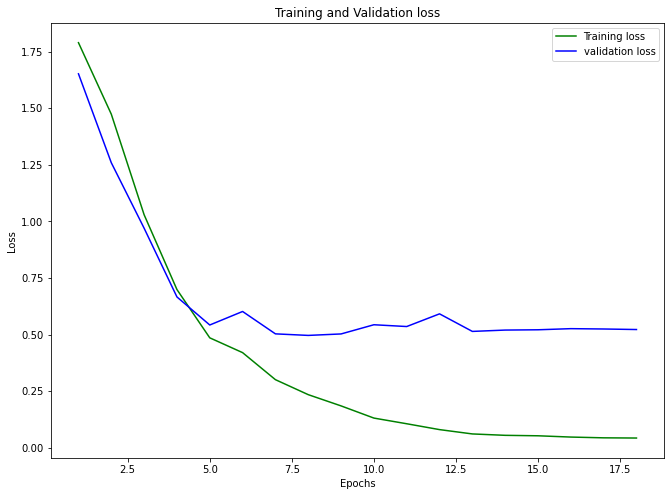

In [58]:
plt.figure(figsize=(11,8))
loss_train = history_cnn.history['loss']
loss_val = history_cnn.history['val_loss']
epochs = range(1,len(loss_train) + 1)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Accuarcy Curve CNN

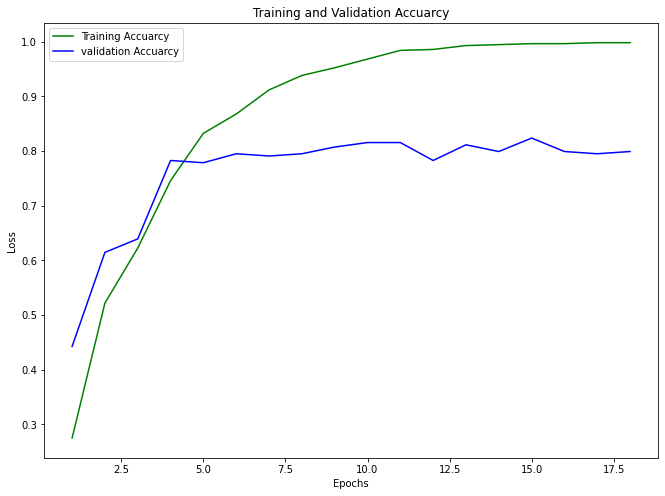

In [60]:
plt.figure(figsize=(11,8))
acc_train = history_cnn.history['acc']
acc_val = history_cnn.history['val_acc']
epochs = range(1,len(acc_train) + 1)
plt.plot(epochs, acc_train, 'g', label='Training Accuarcy')
plt.plot(epochs, acc_val, 'b', label='validation Accuarcy')
plt.title('Training and Validation Accuarcy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Confusion Matrix CNN

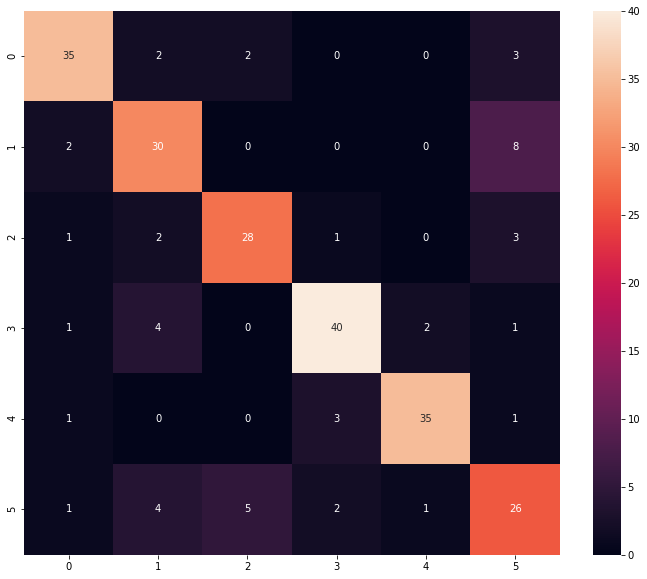

In [62]:
y_pred_cnn = cnn_model.predict(x_test)
conf_matrix(y_test, y_pred_cnn)

## Class Report CNN

In [63]:
class_report(y_test, y_pred_cnn)

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.71      0.75      0.73        40
           2       0.80      0.80      0.80        35
           3       0.87      0.83      0.85        48
           4       0.92      0.88      0.90        40
           5       0.62      0.67      0.64        39

    accuracy                           0.80       244
   macro avg       0.80      0.79      0.79       244
weighted avg       0.80      0.80      0.80       244

